In [1]:
#coding: utf-8 

**dataset link**:https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link/data

**GitHub link:**https://github.com/xGOBx/Data-Analysis-for-Lung-Cancer-Prediction-API-Project3

**This dataset provides information about lung cancer patients, including their demographics, health habits, and symptoms.**

**The Prediction goal is to predict the "Level" of cancer based on the dataset's features. This means determining the severity or stage of cancer (i.e., "Low," "Medium," or "High") for each patient.The goal is to also tell which features correlate to lung-cancer, weather that be one feature or multiple features together equaling lung-cancer**

**Target variable: Level**


## How does this algorithm work?: 
Support Vector Machine (SVM) is a supervised machine learning algorithm suitable for classification or regression tasks. Its main purpose is to determine a hyperplane that best distinguishes data points of different classes, aiming to maximize the margin between these classes. The hyperplane is strategically chosen to maximize the separation among the nearest data points of distinct classes, commonly referred to as support vectors.**


## What type of prediction tasks does it fit for?:
**Binary Classification: SVM is commonly used for binary classification problems where the goal is to separate data points into two classes.**

**Multi-class Classification: SVM can be extended for multi-class classification by using techniques like one-vs-one or one-vs-all.**

**Regression: SVM can also be applied for regression tasks where the goal is to predict a continuous target variable.**



## The advantages and disadvantages of this algorithm?:**
**Effective in High-Dimensional Spaces: SVM works well in high-dimensional spaces, making it suitable for problems with a large number of features.**

**Memory Efficient: SVM uses a subset of training points (support vectors), making it memory efficient.**

**Versatile Kernel Options: The use of different kernel functions allows SVM to handle non-linear decision boundaries.**

**Robust to Outliers: SVM is less sensitive to outliers compared to some other algorithms.**

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score



# 1. Load the dataset


In [3]:
df = pd.read_csv("cancerdata.csv")

In [4]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

# 2. DATA EXPLORATION

In [5]:
df.head()


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.shape

(1000, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [8]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


# 2. Basic Data Cleaning


**Missing Values**

In [9]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
df = df.drop_duplicates()


**Columns to drop**

In [11]:
df = df.drop(['Patient Id', 'index'], axis=1)


**Changed Level to use Numerical Format**

In [12]:
df = df.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})

**Target Varible before Balancing**

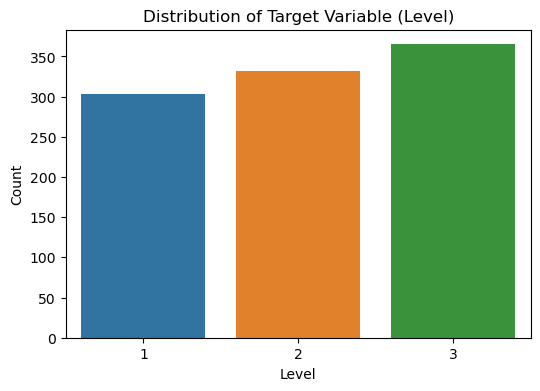

3    365
2    332
1    303
Name: Level, dtype: int64

In [13]:
class_counts = df['Level'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Target Variable (Level)")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

df['Level'].value_counts()

In [14]:
# Check Target variable is balanced
class_counts = df['Level'].value_counts()
min_class_count = min(class_counts)

if not all(count == min_class_count for count in class_counts):
    print("Target variable is not balanced.")
    print("Balancing the target variable...")

    # under-sampling on majority class
    under_sampler = RandomUnderSampler(sampling_strategy={1: min_class_count, 2: min_class_count, 3: min_class_count}, random_state=1)
    X_under_sampled, y_under_sampled = under_sampler.fit_resample(df.drop(['Level'], axis=1), df['Level'])

    # over-sampling on minority classes
    smote = SMOTE(sampling_strategy='auto', random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X_under_sampled, y_under_sampled)

    df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
    df_resampled['Level'] = y_resampled
    df = df_resampled

    class_counts = df['Level'].value_counts()
    if all(count == min_class_count for count in class_counts):
        print("Target variable is balanced after resampling.")
    else:
        print("Balancing did not achieve balance.")
else:
    print("Target variable is already balanced.")

Target variable is not balanced.
Balancing the target variable...
Target variable is balanced after resampling.


**Target Varible After Balancing**

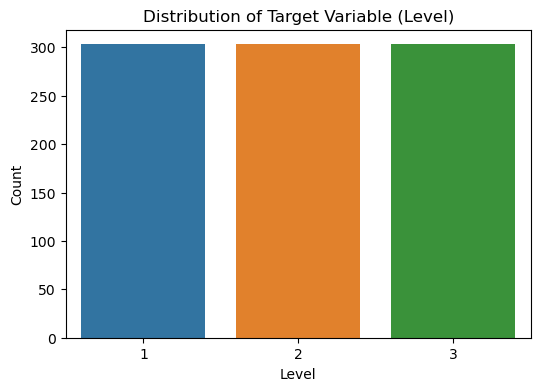

1    303
2    303
3    303
Name: Level, dtype: int64

In [15]:
class_counts = df['Level'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Target Variable (Level)")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

df['Level'].value_counts()

**Label Encoding**

In [16]:
label_encoder = LabelEncoder()
categorical_columns = ['Level']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Data Visualization


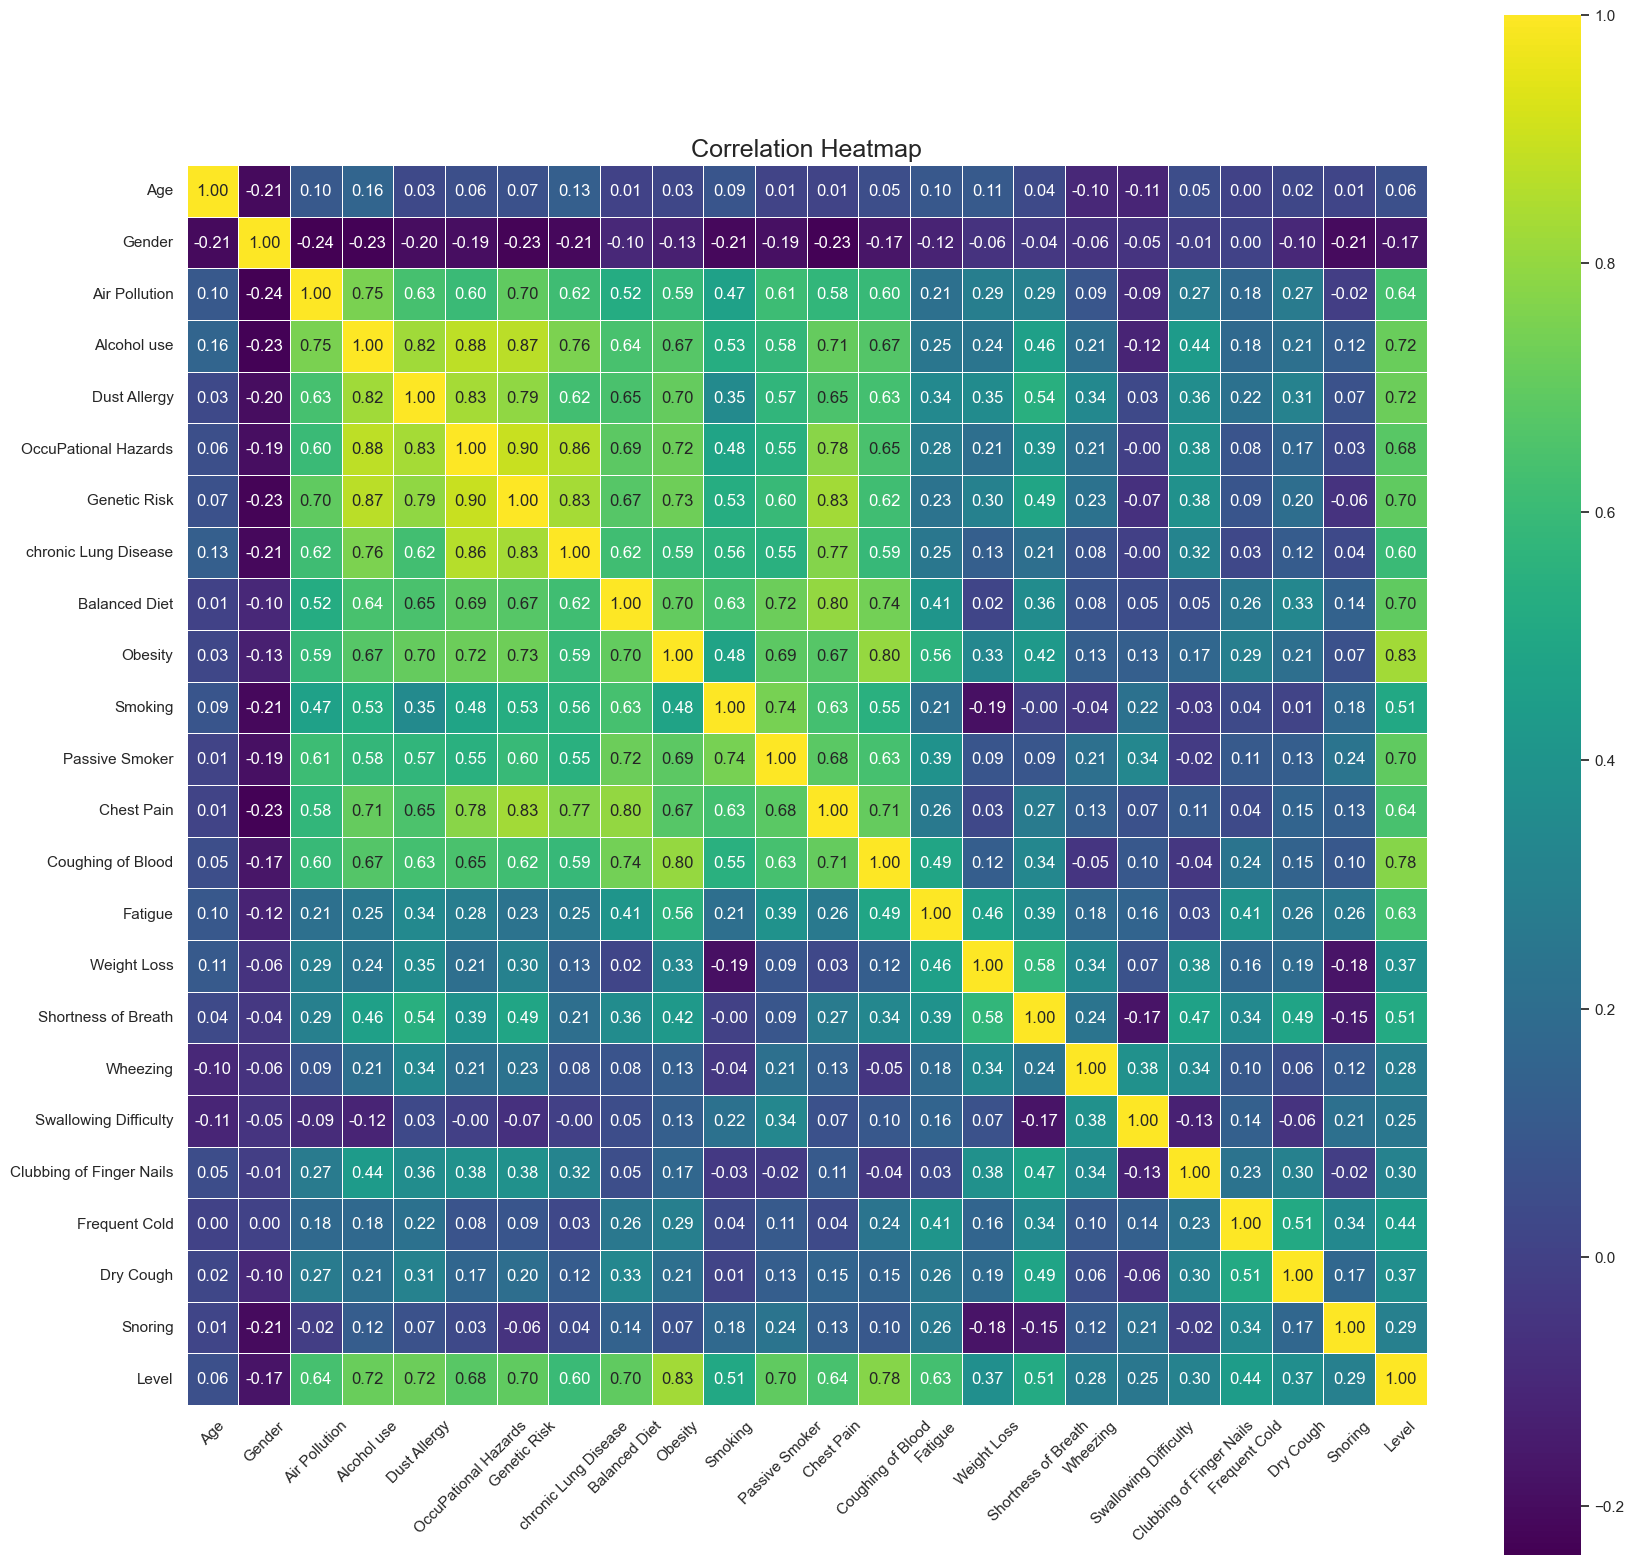

In [17]:
plt.figure(figsize=(20, 20))
correlation_matrix = df.corr()
sns.set(font_scale=1)
sns.set_style("whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45)
plt.show()

# Data Splitting



In [18]:
X=df.drop(['Level'],axis=1)
y=df['Level']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Data Preprocessing


In [20]:
# ANOVA (F-test)
# k_best to 'all' to select all features
k_best = 'all'

# Compute the F-values and p-values for each feature
f_value, p_value = f_classif(X_train, y_train)

# Feature selector using the SelectKBest method with the F-test
selector_f = SelectKBest(f_classif, k=k_best)

# Fit feature selector to training data and transform to keep only the selected features
X_train = selector_f.fit_transform(X_train, y_train)
X_test = selector_f.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector_f.get_support(indices=True)

# Creates a list of selected feature names using the column indices
selected_features = [X.columns[i] for i in selected_feature_indices]

# Convert the transformed data back to a DataFrame with the selected feature names
X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# Print the selected feature names, F-values, and p-values for the selected features
print("ANOVA (F-test) - Selected Features:")
print("Selected Features:", selected_features)
print("F-values for selected features:", f_value[selected_feature_indices])
print("p-values for selected features:", p_value[selected_feature_indices])
print("\n")


# Highly Correlated Features
correlation_matrix = X_train.corr()
highly_correlated_features = set()
correlation_threshold = 0.74

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        correlation_value = correlation_matrix.iloc[i, j]
        if abs(correlation_value) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add((feature_i, feature_j, correlation_value))

# Print the highly correlated features and their correlation values
print("Highly Correlated Features (above 0.74 threshold):")
for feature_i, feature_j, correlation_value in highly_correlated_features:
    print(f"{feature_i} and {feature_j} are highly correlated with a correlation value of {correlation_value:.2f}")


ANOVA (F-test) - Selected Features:
Selected Features: ['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
F-values for selected features: [  4.95459317  11.51004301 336.34289676 399.54565959 429.08007046
 299.92029281 354.45518904 205.60024541 469.90980513 806.95185218
 259.62652923 544.33834649 301.65446682 684.48945865 238.50065236
  79.8084607  146.59555064  91.49966397  31.49085115  88.37047982
  86.01620552  55.82736895  60.17009846]
p-values for selected features: [7.29188396e-003 1.19970877e-005 5.00755668e-104 1.19831126e-117
 1.24940135e-123 1.32081107e-095 4.72142156e-108 1.94576569e-071
 1.53074394e-131 5.13008844e-185 9.88118035e-086 5.16885088e-145
 5.1

# Model Building - Using RandomForest for multi-class classification


In [21]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='linear', C=1,probability=True, class_weight='balanced')
model.fit(X_train_scaled, y_train)


model = SVC(kernel='linear', C=1,probability=True, class_weight='balanced')
model.fit(X_train, y_train)


SVC(C=1, class_weight='balanced', kernel='linear', probability=True)

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_


Best Hyperparameters: {'C': 0.1, 'kernel': 'linear'}


In [23]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)


# Evaluation


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [25]:
import pickle

# Save the model to a file
model_filename = r"C:\Users\gaven\lung_cancer_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")


Model saved to C:\Users\gaven\lung_cancer_model.pkl


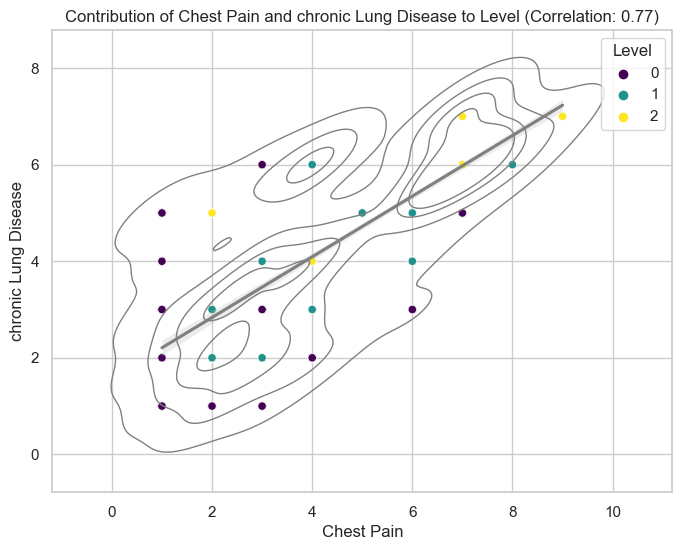

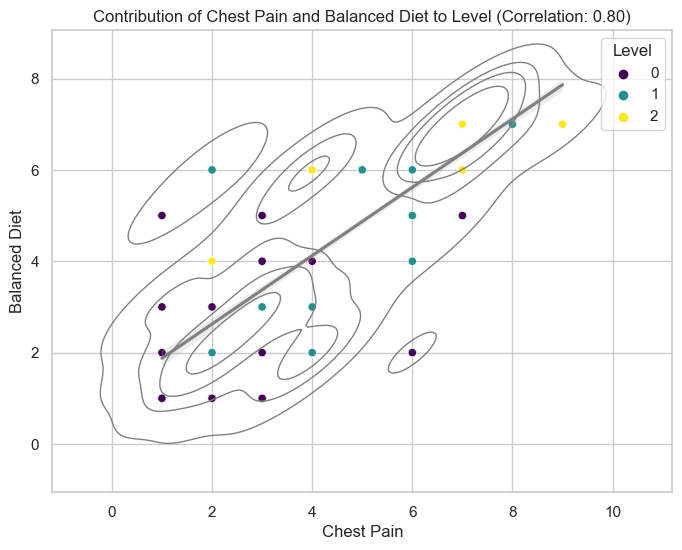

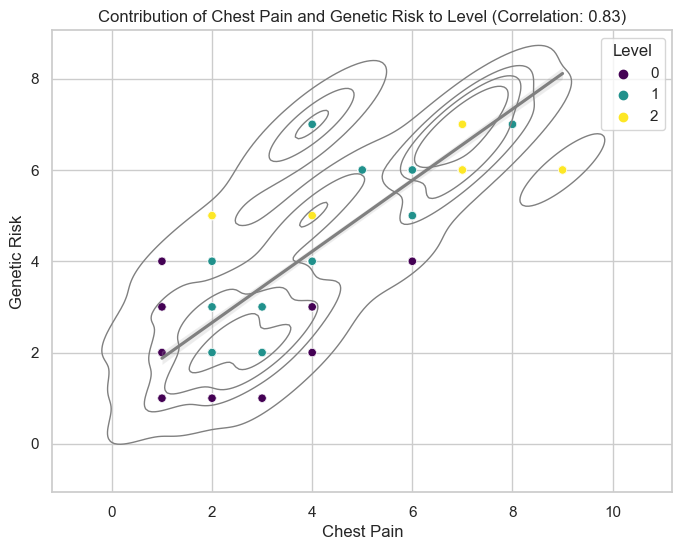

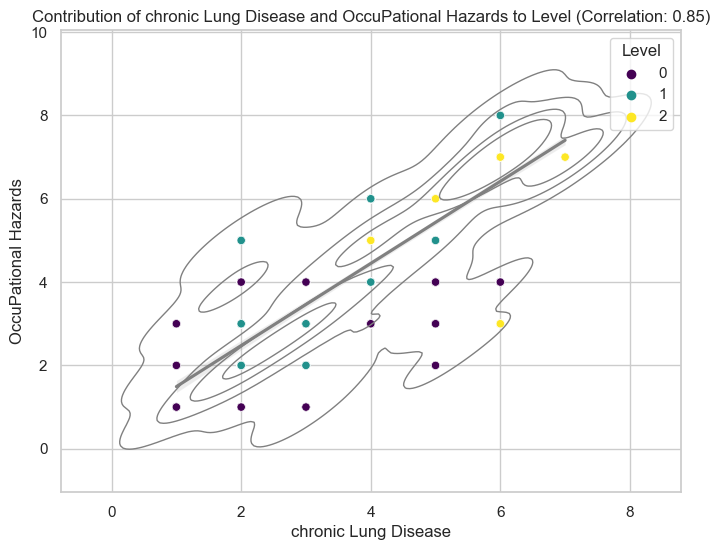

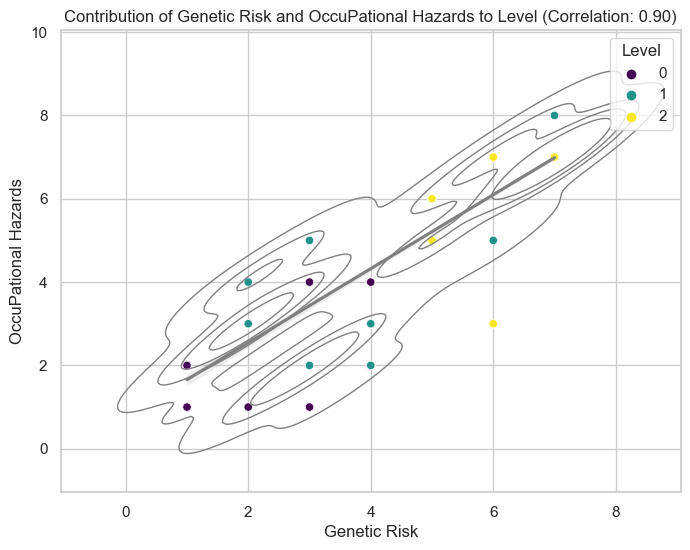

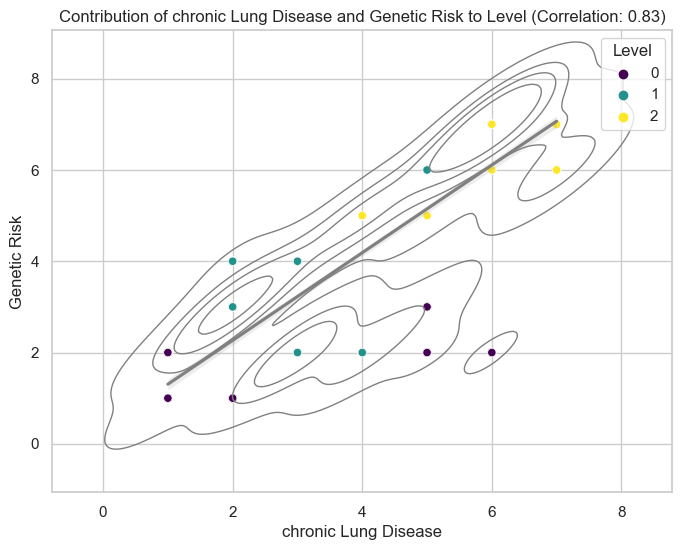

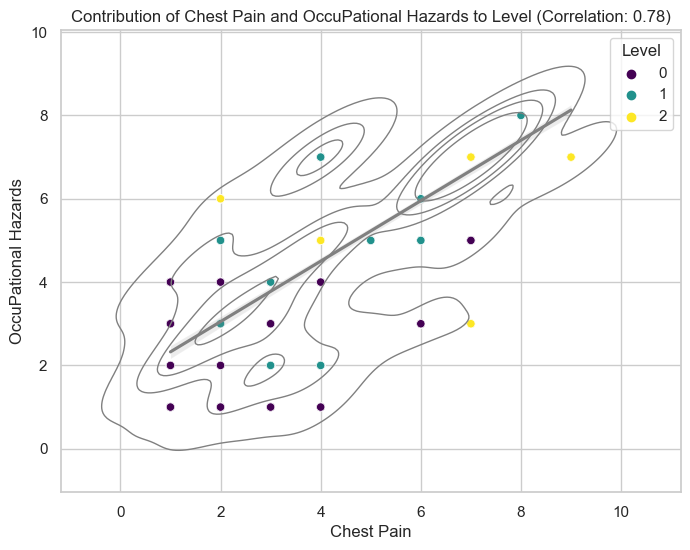

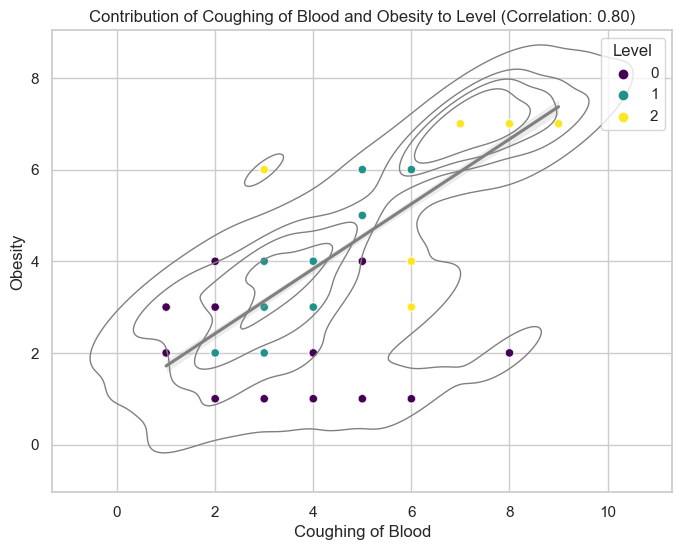

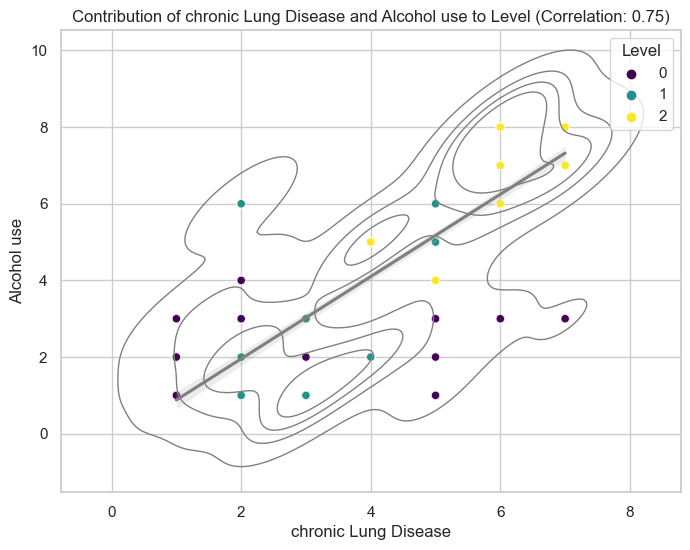

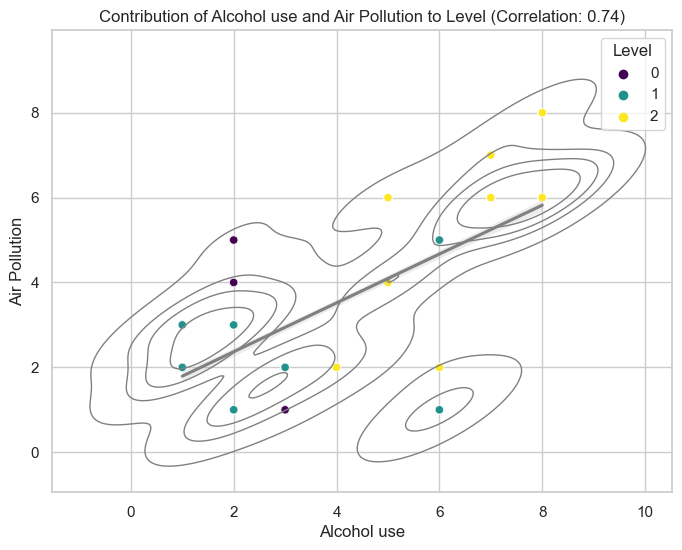

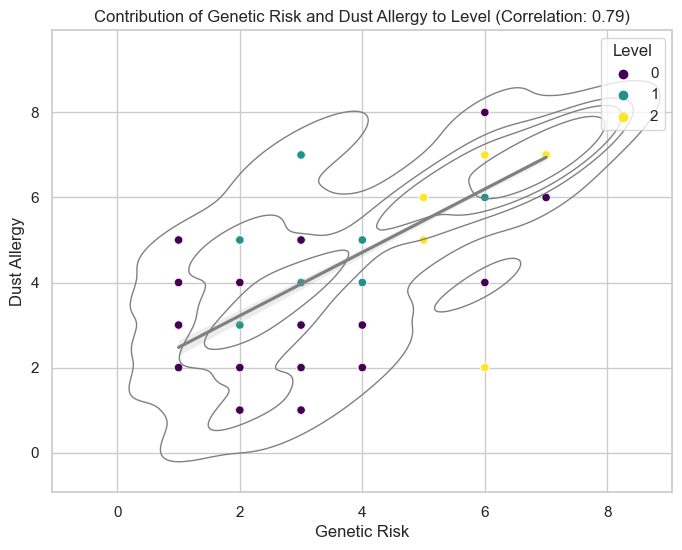

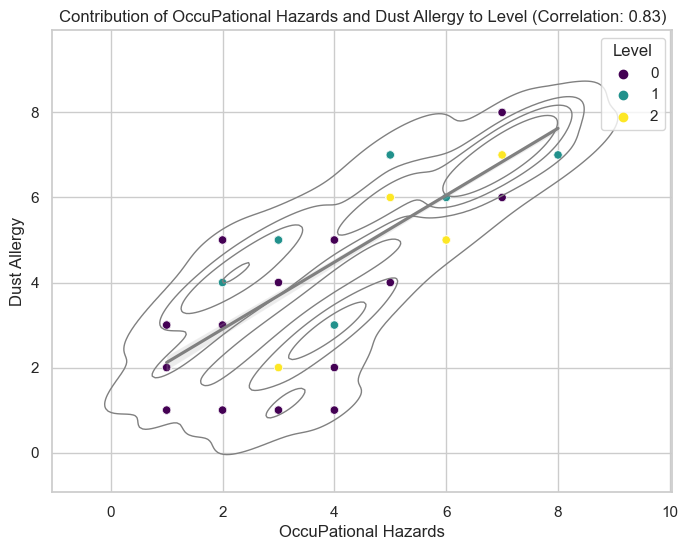

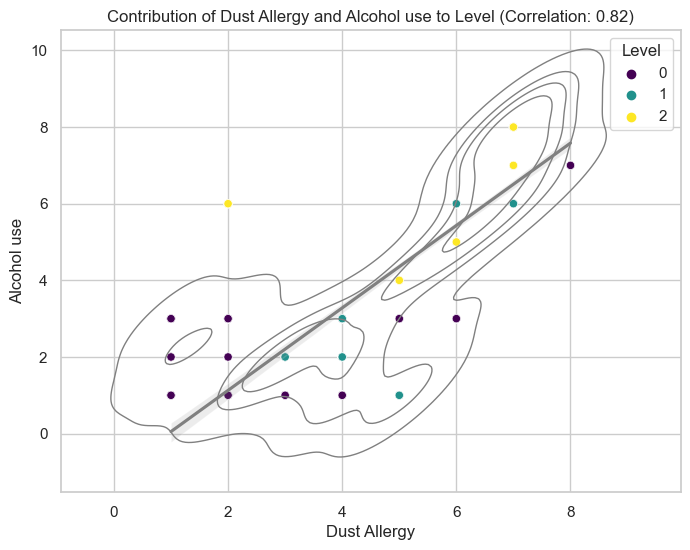

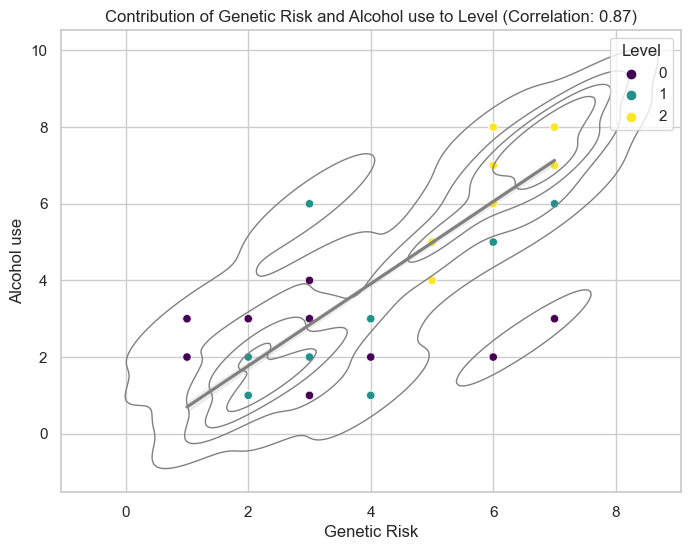

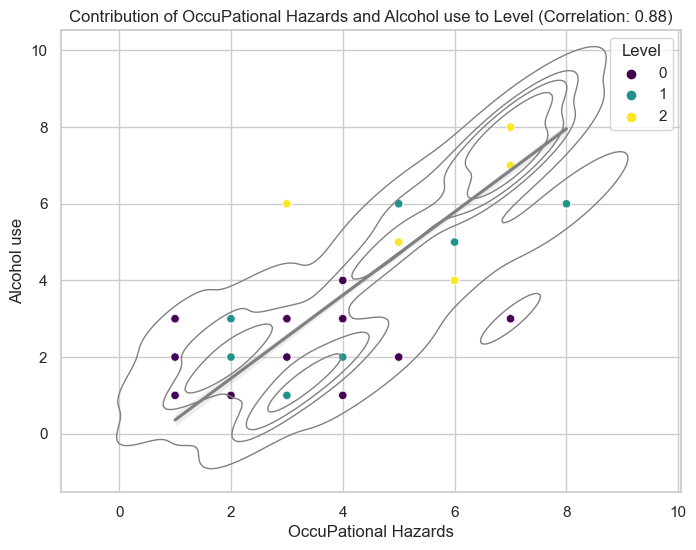

In [26]:
# Correlated Features
highly_correlated_features_list = [(feature_i, feature_j, correlation_value) for feature_i, feature_j, correlation_value in highly_correlated_features]

# Iterate highly correlated feature pairs
for feature_i, feature_j, correlation_value in highly_correlated_features_list:
    # Scatter plot
    plt.figure(figsize=(8, 6))
    
    sns.scatterplot(x=feature_i, y=feature_j, hue='Level', data=df, palette='viridis')

    # regression line
    sns.regplot(x=feature_i, y=feature_j, data=df, scatter=False, color='gray')

    # density contours
    sns.kdeplot(x=df[feature_i], y=df[feature_j], levels=5, color='gray', linewidths=1)

    plt.title(f'Contribution of {feature_i} and {feature_j} to Level (Correlation: {correlation_value:.2f})')
    plt.xlabel(feature_i)
    plt.ylabel(feature_j)
    plt.legend(title='Level')
    
    plt.show()

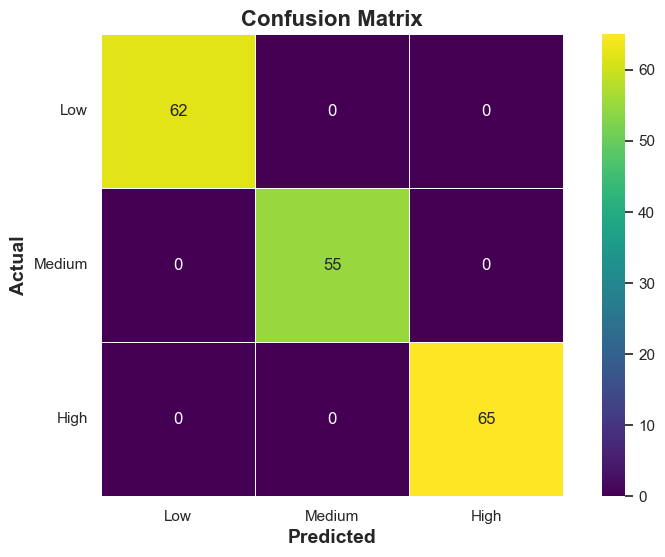

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='viridis', linewidths=0.4, square=True, cbar=True,
    xticklabels=["Low", "Medium", "High"],
    yticklabels=["Low", "Medium", "High"]
)
plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)
plt.show()